<h1 style="color: red;">House Price Prediction Using <span style="color:green;"> Machine Learning </span></h1>

<h2> Install Important Libraries</h2>

In [1]:

!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#lOAD DATASET LOCAL STORAGE

my_data=pd.read_csv("House Price India.csv")

In [4]:
#Show Size
my_data.shape

(14620, 23)

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [6]:
#Data Look Like
my_data.sample(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
8905,6762824540,42627,3,2.50,2430,7857,2.0,0,0,5,...,1980,0,122042,52.6846,-114.401,2160,8740,1,72,359000
2853,6762820752,42537,4,2.50,1670,3315,2.0,0,0,3,...,2005,0,122011,52.7832,-114.188,1650,2051,1,58,451000
11494,6762826214,42670,3,1.75,1400,18002,1.0,0,0,3,...,1977,0,122055,52.9550,-114.157,2240,14068,3,55,322000
13307,6762824101,42705,3,2.75,1250,1655,2.0,0,0,3,...,2006,0,122016,52.7854,-114.572,1520,3001,2,50,370000
9267,6762812308,42634,4,4.00,3610,12811,2.0,0,0,3,...,2000,0,122020,52.8112,-114.183,3530,11783,3,71,870000


In [7]:
#Data Relation
my_data.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [8]:
#Check Duplicate Value
my_data.duplicated().sum()

np.int64(0)

In [9]:
my_data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


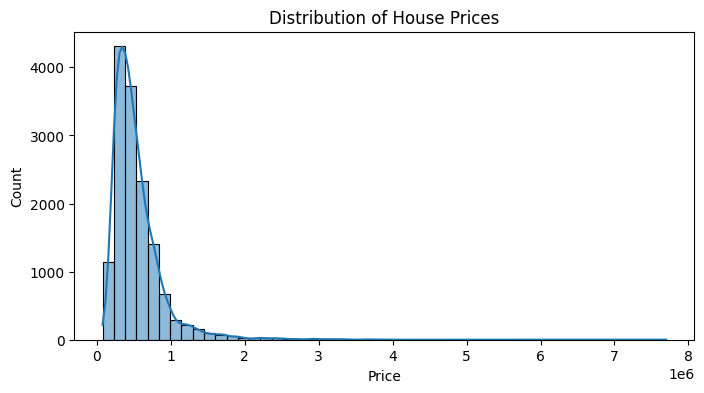

In [10]:
#Target Variable Distribution (Price)
plt.figure(figsize=(8, 4))
sns.histplot(my_data['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


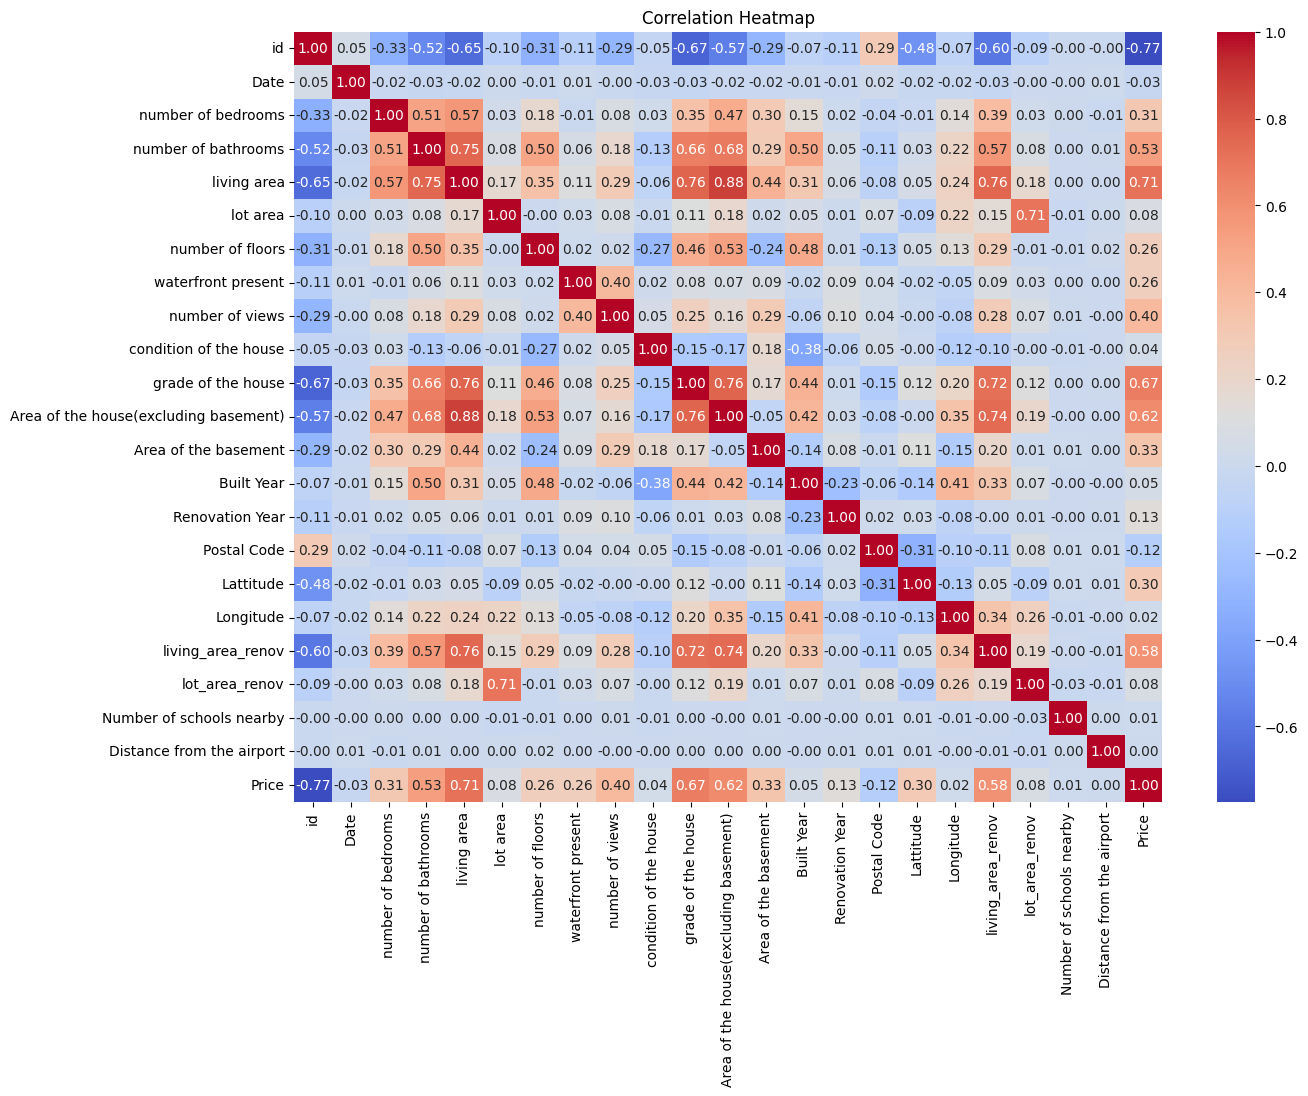

In [11]:
#Correlation Matrix (Numerical Features Only)

plt.figure(figsize=(14, 10))
sns.heatmap(my_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
#Top Correlated Features with Price

correlations = my_data.corr(numeric_only=True)['Price'].sort_values(ascending=False)
print("Top correlated features:\n", correlations.head(10))

Top correlated features:
 Price                                    1.000000
living area                              0.712169
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
living_area_renov                        0.584924
number of bathrooms                      0.531735
number of views                          0.395973
Area of the basement                     0.330202
number of bedrooms                       0.308460
Lattitude                                0.297490
Name: Price, dtype: float64


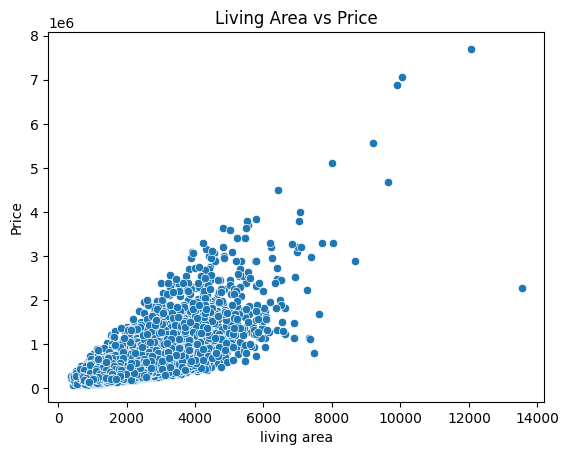

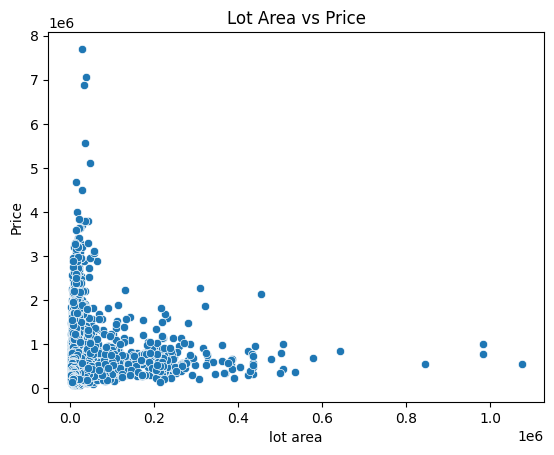

In [13]:
#Scatterplots: Area vs Price

sns.scatterplot(x='living area', y='Price', data=my_data)
plt.title('Living Area vs Price')
plt.show()

sns.scatterplot(x='lot area', y='Price', data=my_data)
plt.title('Lot Area vs Price')
plt.show()


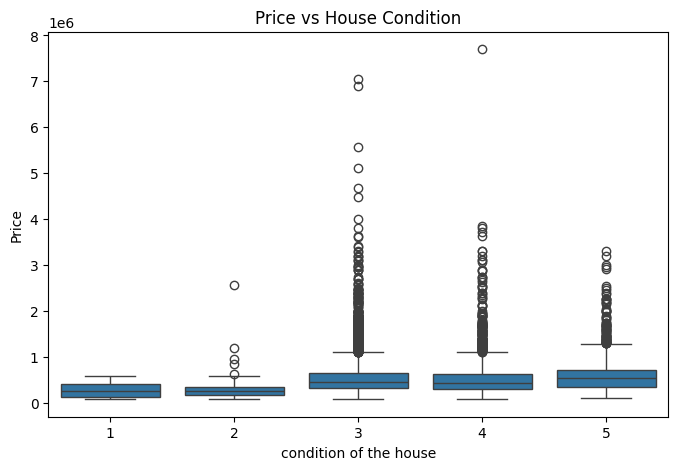

In [14]:
#Boxplot: Condition vs Price

plt.figure(figsize=(8, 5))
sns.boxplot(x='condition of the house', y='Price', data=my_data)
plt.title('Price vs House Condition')
plt.show()


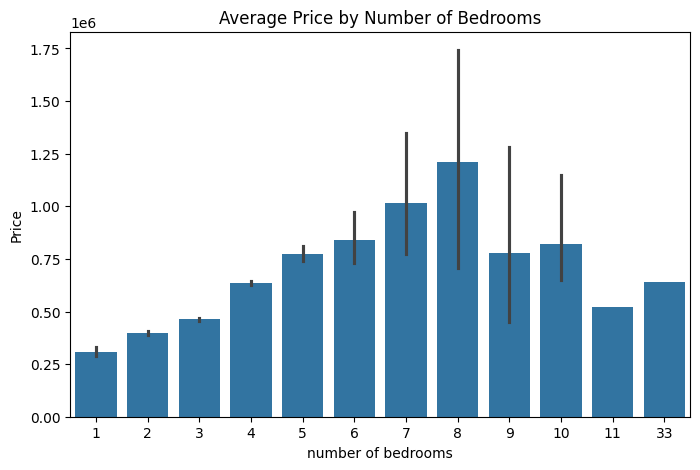

In [15]:
#Bar Plot: Number of Bedrooms vs Price

plt.figure(figsize=(8, 5))
sns.barplot(x='number of bedrooms', y='Price', data=my_data)
plt.title('Average Price by Number of Bedrooms')
plt.show()

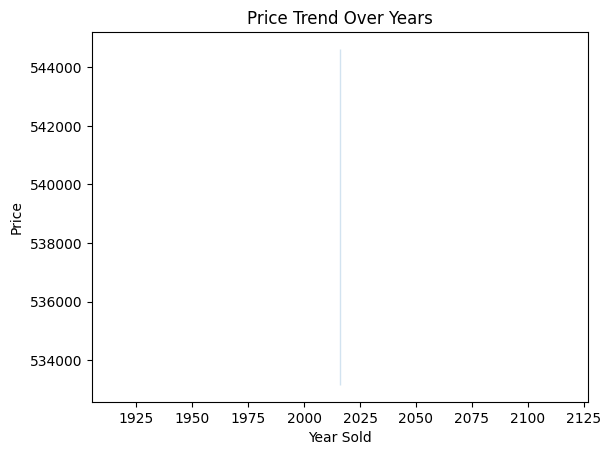

In [16]:
#Optional: Convert Date to Year

# Convert days (e.g., 42538) to actual date from Excel origin
my_data['Date'] = pd.to_datetime(my_data['Date'], origin='1899-12-30', unit='D')
my_data['Year Sold'] = my_data['Date'].dt.year

# Price trend over time
sns.lineplot(x='Year Sold', y='Price', data=my_data)
plt.title('Price Trend Over Years')
plt.show()


<h2> Step-by-Step: Train a Model to Predict Price </h2>

In [17]:
# Import Required Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
#Preprocess Dataset

# Drop columns that won't help the model
my_data = my_data.drop(['id', 'Date'], axis=1)

# Drop rows with missing values (optional: or fill with mean)
my_data = my_data.dropna()

In [19]:
#Define Features and Target

X = my_data.drop('Price', axis=1)  # Features
y = my_data['Price']               # Target


In [20]:
#Encode Categorical Variables (if any)

# Ensure all features are numeric
X = pd.get_dummies(X, drop_first=True)


In [21]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Train a Random Forest Regressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
#Make Predictions and Evaluate

y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 134294.18
R² Score: 0.87


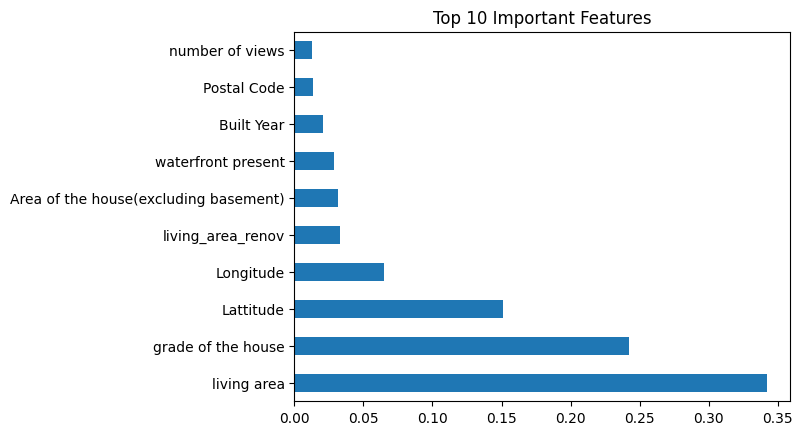

In [24]:
#Feature Importance
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


<h3> XGBoost and LightGBM</h3>                          .

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("Updated_House_Price_India.csv")

# Drop non-useful or string columns
data = data.drop(columns=["id", "Date", "Postal Code"])
data = data.dropna()

# Define features and target
X = data.drop("Price", axis=1)
y = data["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 1. Random Forest Regressor
# ----------------------------
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)

# ----------------------------
# 2. XGBoost Regressor
# ----------------------------
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)

# ----------------------------
# 3. LightGBM Regressor
# ----------------------------
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_r2 = r2_score(y_test, lgb_pred)

# ----------------------------
# 🎯 Compare Results
# ----------------------------
print("✅ R² Scores for House Price Prediction:")
print(f"Random Forest : {rf_r2:.4f}")
print(f"XGBoost       : {xgb_r2:.4f}")
print(f"LightGBM      : {lgb_r2:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3050
[LightGBM] [Info] Number of data points in the train set: 11696, number of used features: 23
[LightGBM] [Info] Start training from score 537783.716399
✅ R² Scores for House Price Prediction:
Random Forest : 0.8748
XGBoost       : 0.8761
LightGBM      : 0.8932


In [26]:
my_data.shape

(14620, 22)